# Singling out-Risk examples

In [1]:
import os
import sys

import pandas as pd

sys.path.append("../..")

from leakpro.synthetic_data_attacks.anonymeter.evaluators.singling_out_evaluator import SinglingOutEvaluator
from leakpro.synthetic_data_attacks.plots import plot_singling_out
from leakpro.synthetic_data_attacks.singling_out_utils import load_singling_out_results, singling_out_risk_evaluation

#Get ori and syn
n_samples = 100
DATA_PATH = "./datasets/"
ori = pd.read_csv(os.path.join(DATA_PATH, "adults_ori.csv"), nrows=n_samples)
syn = pd.read_csv(os.path.join(DATA_PATH, "adults_syn.csv"), nrows=n_samples)

## Basic example

A very basic example requires an original (`ori`) and a synthetic (`syn`) pandas dataframes.

Afterwards, instantiate the evaluator and run `evaluate` and `print_results` methods.

**Note:** adjust `n_attacks` as needed, default value is `n_attacks=2_000`

In [2]:
print("Singling-out example with n_cols = 1")
evaluator = SinglingOutEvaluator(
    ori = ori,
    syn = syn,
    n_cols = 1,
    n_attacks = 100
)
results = evaluator.evaluate()
results.print_results()
print("Singling-out queries:", evaluator.main_queries.queries[0:3])

Singling-out example with n_cols = 1
Main singling out attack generated only 31 singling out queries out of the requested 100. This can probably lead to an underestimate of the singling-out risk.
Success rate of main attack (and nr and total): 31.34%, 9, 31
Success rate of naive attack (and nr and total): 4.74%, 3, 100
Residual rate: 26.61%
Singling-out queries: ['age == 60', 'capital_loss == 1669', 'age == 64']


In [3]:
print("Singling-out example with n_cols = 3")
evaluator = SinglingOutEvaluator(
    ori = ori,
    syn = syn,
    n_cols = 3,
    n_attacks = 100,
    max_attempts = 10_000
)
results = evaluator.evaluate()
results.print_results()
print("Singling-out queries:", evaluator.main_queries.queries[0:3])

Singling-out example with n_cols = 3
Reached maximum number of attempts (10000) when generating singling out queries. Returning 88 instead of the requested 100 queries. To avoid this, increase max_attempts or set it to `None` to disable limit.
Main singling out attack generated only 88 singling out queries out of the requested 100. This can probably lead to an underestimate of the singling-out risk.
Success rate of main attack (and nr and total): 28.22%, 24, 88
Success rate of naive attack (and nr and total): 9.55%, 8, 100
Residual rate: 18.67%
Singling-out queries: ["type_employer == 'Local-gov' & marital == 'Divorced' & hr_per_week <= 40", "education_num <= 10 & education == 'Some-college' & capital_loss >= 1977", "capital_loss <= 0 & marital == 'Separated' & education_num >= 14"]


# Singling out risk evaluation (`n_cols` integer)

With `n_cols` set as an integer, `singling_out_evaluator` returns same results (functionality wise) as basic example above, but with a format to be able to plot the risk.

**Note:** adjust `n_attacks` as needed. Default values is: `n_attacks=2_000`

In [4]:
#Perform singling out risk evaluation n_cols==1
sin_out_res = singling_out_risk_evaluation(
    dataset = "adults",
    ori = ori,
    syn = syn,
    n_cols = 1,
    n_attacks = 100,
    verbose = True,
    save_results_json = True,
    max_attempts = 10_000
)


Running singling out risk evaluation for `adults` with n_cols 1
Main singling out attack generated only 32 singling out queries out of the requested 100. This can probably lead to an underestimate of the singling-out risk.
Finished aux_singling_out_risk_evaluation for n_cols: 1

### Results saved! res_singling_out_n_cols_1_adults.json


In [5]:
#Get singling out risk n_cols==1 from json file
sin_out_res = load_singling_out_results(dataset="adults", n_cols=1)

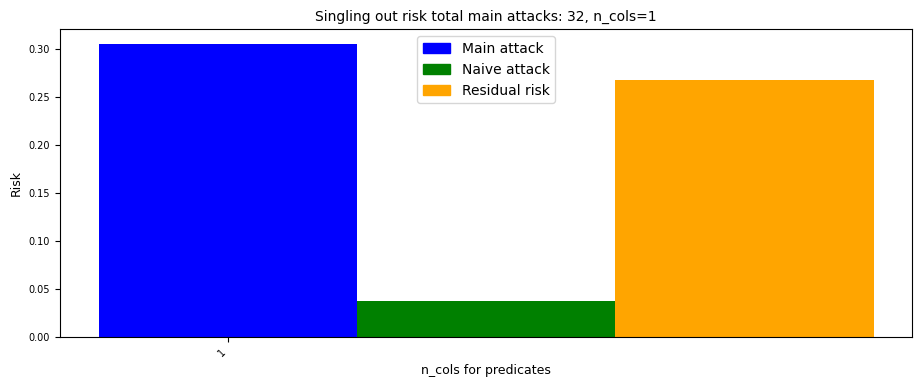

In [6]:
#Plot singling out risk
plot_singling_out(sin_out_res=sin_out_res, high_res_flag=False)

# Singling out risk evaluation (`n_cols` all)

With `n_cols` not set (or set as `None`), `singling_out_evaluator` returns a full singling out evaluation, with auxiliary information spanning the range of all columns (e.g. `n_cols in range(len(ori.columns)`).

**Note:** adjust `n_attacks` as needed. Default values is: `n_attacks=2_000`

In [7]:
#Perform singling out risk evaluation n_cols not set
sin_out_res = singling_out_risk_evaluation(
    dataset = "adults",
    ori = ori,
    syn = syn,
    n_attacks = 90,
    verbose = True,
    save_results_json = True,
    max_attempts = 10_000
)


Running singling out risk evaluation for `adults` with n_cols all
Nr. of processors to use for singling out evaluation: 6
Main singling out attack generated only 32 singling out queries out of the requested 90. This can probably lead to an underestimate of the singling-out risk.
Finished aux_singling_out_risk_evaluation for n_cols: 1
Finished aux_singling_out_risk_evaluation for n_cols: 7
Finished aux_singling_out_risk_evaluation for n_cols: 10
Finished aux_singling_out_risk_evaluation for n_cols: 5
Finished aux_singling_out_risk_evaluation for n_cols: 12
Finished aux_singling_out_risk_evaluation for n_cols: 6
Finished aux_singling_out_risk_evaluation for n_cols: 9
Finished aux_singling_out_risk_evaluation for n_cols: 13
Finished aux_singling_out_risk_evaluation for n_cols: 4
Finished aux_singling_out_risk_evaluation for n_cols: 8
Finished aux_singling_out_risk_evaluation for n_cols: 11
Finished aux_singling_out_risk_evaluation for n_cols: 14
Finished aux_singling_out_risk_evaluation 

In [8]:
#Get singling out risk n_cols all from json file
sin_out_res = load_singling_out_results(dataset="adults")

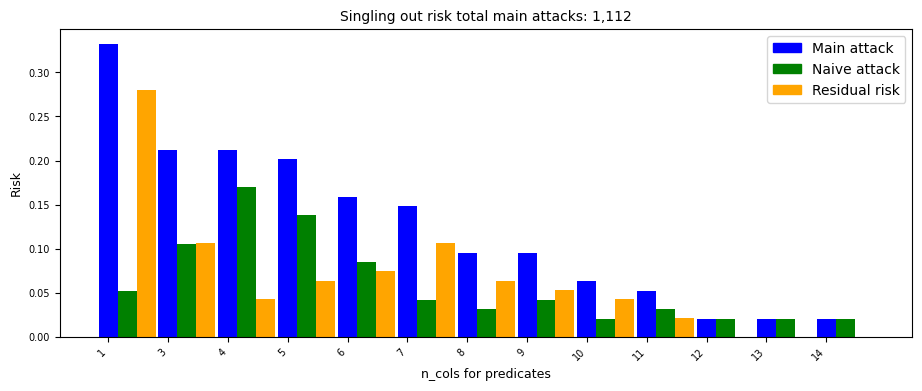

In [9]:
#Plot singling out risk
plot_singling_out(sin_out_res=sin_out_res, high_res_flag=False)

## Results

In [1]:
import os
import sys

import pandas as pd

sys.path.append("../..")

from leakpro.synthetic_data_attacks.plots import plot_singling_out
from leakpro.synthetic_data_attacks.singling_out_utils import load_singling_out_results, singling_out_risk_evaluation

/nfs/home/mirmus/envs/leakpy312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


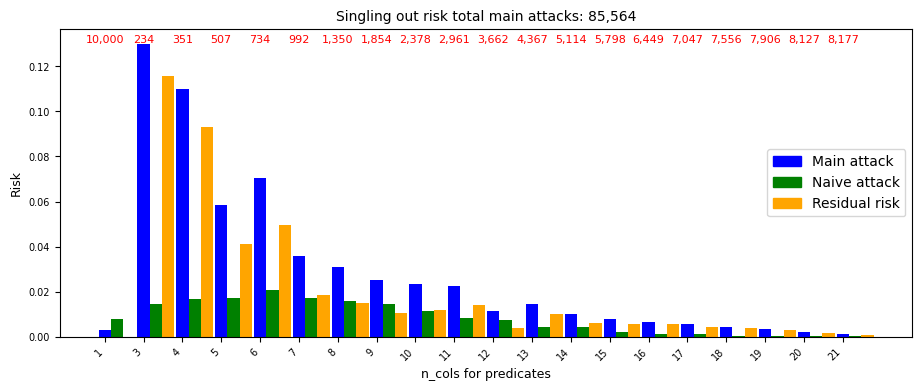

In [3]:
sin_out_res = load_singling_out_results(dataset="los_10K_modified")
plot_singling_out(sin_out_res=sin_out_res, high_res_flag=False)

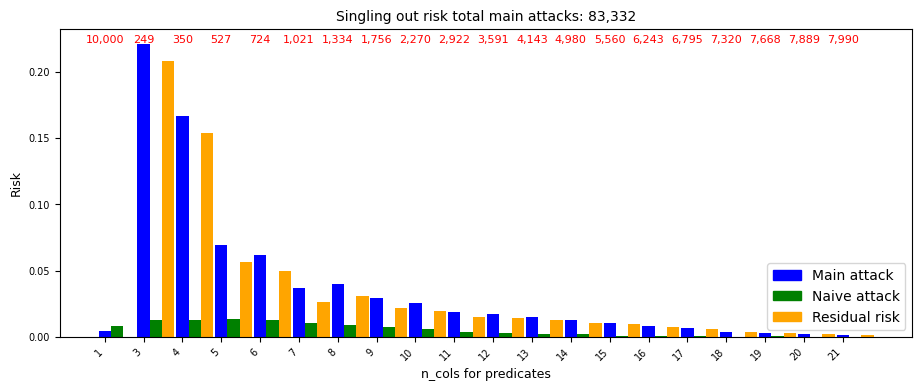

In [4]:
sin_out_res = load_singling_out_results(dataset="los_10K_original")
plot_singling_out(sin_out_res=sin_out_res, high_res_flag=False)

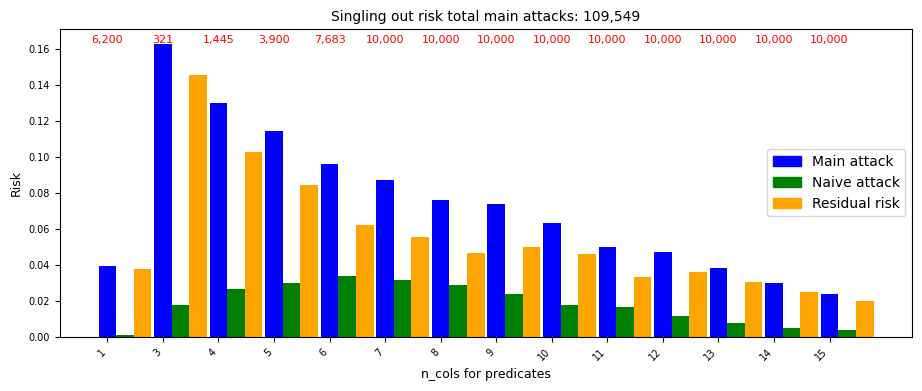

In [5]:
sin_out_res = load_singling_out_results(dataset="adults_10K_modified")
plot_singling_out(sin_out_res=sin_out_res, high_res_flag=False)

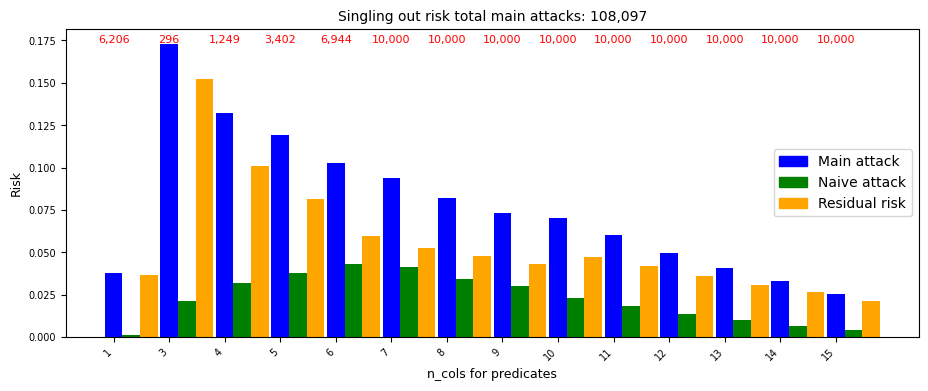

In [6]:
sin_out_res = load_singling_out_results(dataset="adults_10K_original")
plot_singling_out(sin_out_res=sin_out_res, high_res_flag=False)